# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
complete_data.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
95,a520,Ramicane,Male,13,21,25,36.558581,1
96,a520,Ramicane,Male,13,21,30,36.947710,1
97,a520,Ramicane,Male,13,21,35,37.624710,1
98,a520,Ramicane,Male,13,21,40,38.259725,1


In [2]:
# Checking the number of mice.
num_mice = complete_data["Mouse ID"].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice_ID = complete_data.loc[complete_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice_df = complete_data.loc[complete_data["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = complete_data[complete_data['Mouse ID'].isin(dup_mice_ID)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data['Mouse ID'].nunique()
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
variance = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
standard_deviation = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume ": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": standard_deviation,
    "Tumor Volume Std. Err.": sem
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
#print(clean_df.columns)
# Using the aggregation method, produce the same summary statistics in a single line
summary_using_agg = clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])

summary_using_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
mice = clean_data['Drug Regimen'].value_counts()

mice

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

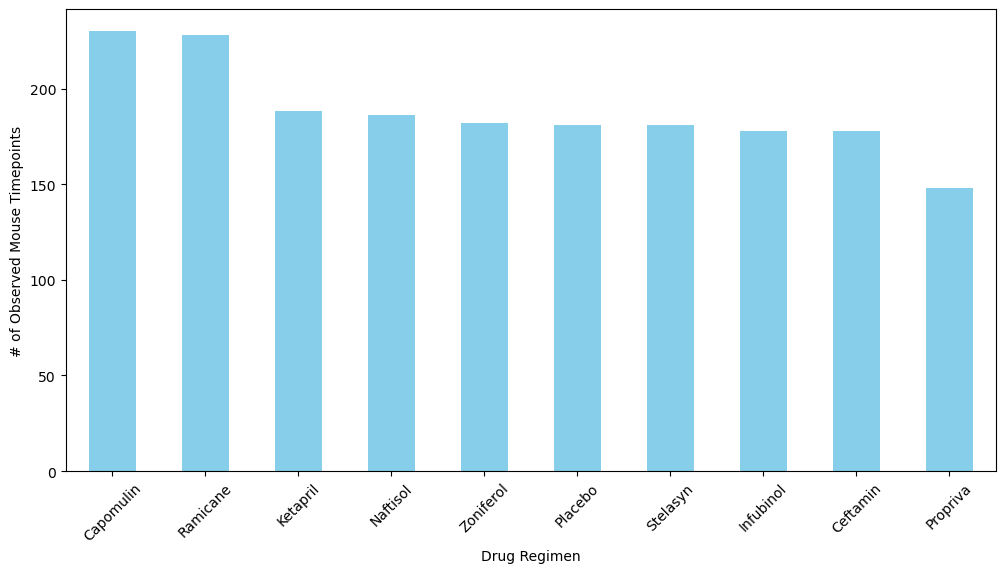

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data = pd.Series({
    'Capomulin': 230,
    'Ramicane': 228,
    'Ketapril': 188,
    'Naftisol': 186,
    'Zoniferol': 182,
    'Placebo': 181,
    'Stelasyn': 181,
    'Infubinol': 178,
    'Ceftamin': 178,
    'Propriva': 148
}, name='count')

df = data.reset_index()
df.columns = ['Drug Regimen', 'count']

df.plot(x='Drug Regimen', y='count', kind='bar', figsize=(12, 6), color='skyblue', legend=False)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45) 


plt.show()

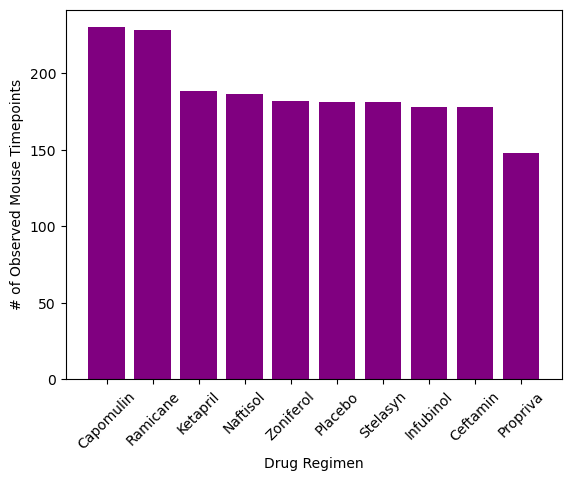

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimens = data.index
counts =  data.values

plt.bar(drug_regimens, counts, color = 'purple')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)

plt.show()

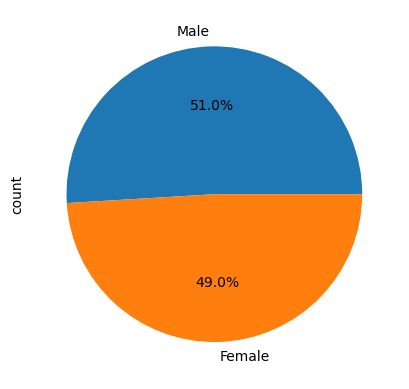

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = clean_data['Sex'].value_counts()

# Make the pie chart
gender.plot.pie(autopct = "%1.1f%%")

plt.show()

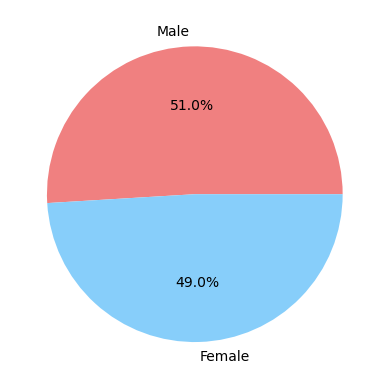

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels = ['Female', 'Male']

# Get the unique mice with their gender
plt.pie(gender, 
        labels=gender.index, 
        autopct='%1.1f%%', 
        colors=['lightcoral', 'lightskyblue'])


# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
#capomulin

# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin", :]
ramicane_data = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
infubinol_data = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
ceftamin_data = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_final = capomulin_data.groupby('Mouse ID').max()['Timepoint']
capomulin_df = pd.DataFrame(capomulin_final)
capomulin_merger = pd.merge(capomulin_df, clean_data, on=("Mouse ID", "Timepoint"), how= "left")
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_merger.head()




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [15]:
capomulin_tumors = capomulin_merger['Tumor Volume (mm3)']

quarantiles = capomulin_tumors.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile of Capomulin tumors is: {lower_q}')
print(f'The upper quarantile of Capomulin tumors is: {upper_q}')
print(f'The interquarantile range of Capomulin tumors is: {iqr}')
print(f'The median Capomulin tumors is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the subjects are below {lower_bound}, they may be outliers')
print(f'If the subjects are above {upper_bound}, they may be outliers')

The lower quarantile of Capomulin tumors is: 32.37735684
The upper quarantile of Capomulin tumors is: 40.1592203
The interquarantile range of Capomulin tumors is: 7.781863460000004
The median Capomulin tumors is: 38.1251644
If the subjects are below 20.70456164999999, they may be outliers
If the subjects are above 51.83201549, they may be outliers


In [16]:
#ramicane

ramicane_final = ramicane_data.groupby('Mouse ID').max()['Timepoint']
ramicane_df = pd.DataFrame(ramicane_final)
ramicane_merger = pd.merge(ramicane_df, clean_data, on=("Mouse ID", "Timepoint"), how= "left")
ramicane_merger.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [17]:
ramicane_tumors = ramicane_merger['Tumor Volume (mm3)']

quarantiles = ramicane_tumors.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile of Ramicane tumors is: {lower_q}')
print(f'The upper quarantile of Ramicane tumors is: {upper_q}')
print(f'The interquarantile range of Ramicane tumors is: {iqr}')
print(f'The median Ramicane tumors is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the subjects are below {lower_bound}, they may be outliers')
print(f'If the subjects are above {upper_bound}, they may be outliers')

The lower quarantile of Ramicane tumors is: 31.56046955
The upper quarantile of Ramicane tumors is: 40.65900627
The interquarantile range of Ramicane tumors is: 9.098536719999998
The median Ramicane tumors is: 36.56165229
If the subjects are below 17.912664470000003, they may be outliers
If the subjects are above 54.30681135, they may be outliers


In [18]:
#infubinol

infubinol_final = infubinol_data.groupby('Mouse ID').max()['Timepoint']
infubinol_df = pd.DataFrame(infubinol_final)
infubinol_merger = pd.merge(infubinol_df, clean_data, on=("Mouse ID", "Timepoint"), how= "left")
infubinol_merger.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [19]:
infubinol_tumors = infubinol_merger['Tumor Volume (mm3)']

quarantiles = infubinol_tumors.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile of Infubinol tumors is: {lower_q}')
print(f'The upper quarantile of Infubinol tumors is: {upper_q}')
print(f'The interquarantile range of Infubinol tumors is: {iqr}')
print(f'The median Infubinol tumors is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the subjects are below {lower_bound}, they may be outliers')
print(f'If the subjects are above {upper_bound}, they may be outliers')

The lower quarantile of Infubinol tumors is: 54.04860769
The upper quarantile of Infubinol tumors is: 65.52574285
The interquarantile range of Infubinol tumors is: 11.477135160000003
The median Infubinol tumors is: 60.16518046
If the subjects are below 36.83290494999999, they may be outliers
If the subjects are above 82.74144559000001, they may be outliers


In [20]:
#ceftamin

ceftamin_final = ceftamin_data.groupby('Mouse ID').max()['Timepoint']
ceftamin_df = pd.DataFrame(ceftamin_final)
ceftamin_merger = pd.merge(ceftamin_df, clean_data, on=("Mouse ID", "Timepoint"), how= "left")
ceftamin_merger.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [21]:
ceftamin_tumors = ceftamin_merger['Tumor Volume (mm3)']

quarantiles = ceftamin_tumors.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile of Ceftamin tumors is: {lower_q}')
print(f'The upper quarantile of Ceftamin tumors is: {upper_q}')
print(f'The interquarantile range of Ceftamin tumors is: {iqr}')
print(f'The median Ceftamin tumors is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the subjects are below {lower_bound}, they may be outliers')
print(f'If the subjects are above {upper_bound}, they may be outliers')

The lower quarantile of Ceftamin tumors is: 48.72207785
The upper quarantile of Ceftamin tumors is: 64.29983003
The interquarantile range of Ceftamin tumors is: 15.577752179999997
The median Ceftamin tumors is: 59.85195552
If the subjects are below 25.355449580000002, they may be outliers
If the subjects are above 87.66645829999999, they may be outliers


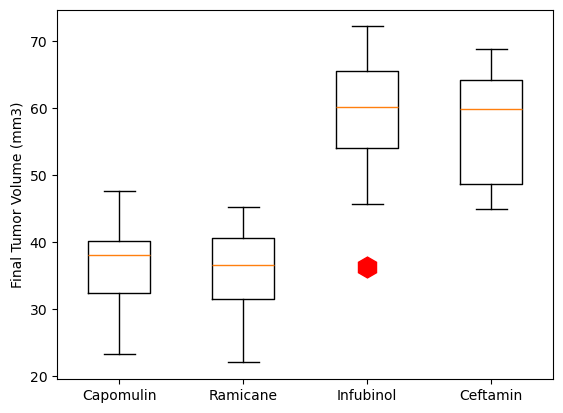

In [22]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
data_plotting = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
red_dot = dict(markerfacecolor="r", markersize = 15, marker="h", markeredgecolor="r")
ax1.boxplot(data_plotting, flierprops = red_dot, labels=treatment, widths = 0.5, vert = True)

plt.show()

## Line and Scatter Plots

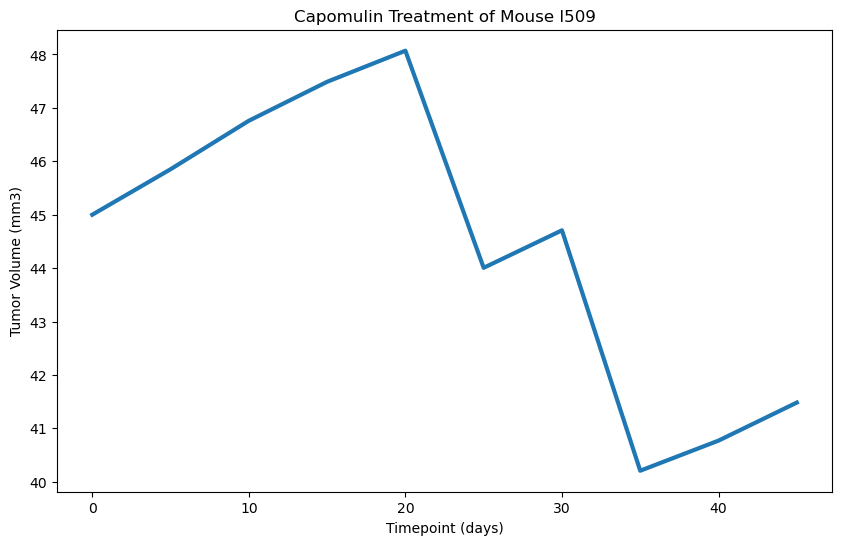

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509",:]
line_plot

time = line_plot["Timepoint"]
volume = line_plot["Tumor Volume (mm3)"]

plt.figure(figsize=(10,6))
line = plt.plot(time, volume, linewidth=3, markersize=20)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

plt.show()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

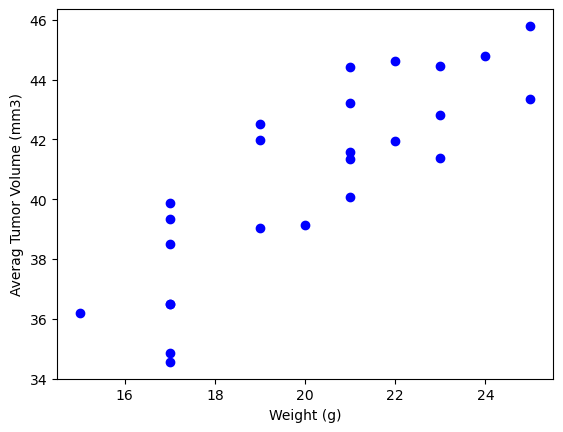

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

cap_avg_vol =capomulin_data.groupby(['Mouse ID'])

marker_size=15
plt.scatter(cap_avg_vol['Weight (g)'].mean(),cap_avg_vol['Tumor Volume (mm3)'].mean(), color="blue")
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [42]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(cap_avg_vol['Weight (g)'].mean(), cap_avg_vol['Tumor Volume (mm3)'].mean())
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}')

The correlation between mouse weight and the average tumor volume is 0.84


In [45]:
linear_regress = st.linregress(cap_avg_vol['Weight (g)'].mean(), cap_avg_vol['Tumor Volume (mm3)'].mean())
linear_regress

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [46]:
slope=0.9544396890241049, 
intercept=21.552160532685008, 
rvalue=0.8419363424694721, 
pvalue=1.3225722434712404e-07, 
stderr=0.12754359033201323, 

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

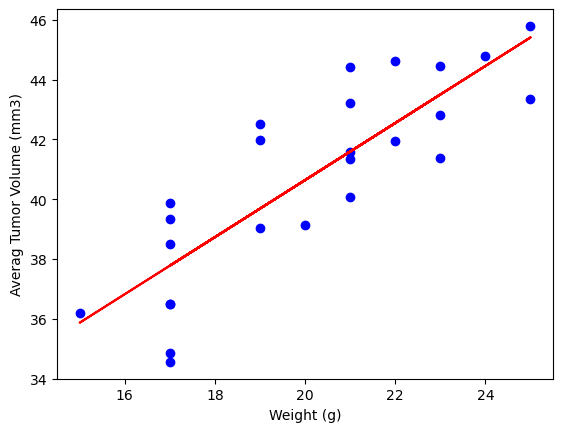

In [48]:
regress = slope * (cap_avg_vol['Weight (g)'].mean()) + intercept

marker = 15
plt.scatter(cap_avg_vol['Weight (g)'].mean(),cap_avg_vol['Tumor Volume (mm3)'].mean(), color="blue")
plt.plot(cap_avg_vol['Weight (g)'].mean(), regress, 'r')
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)')